#### Summary

This dataset is taken from a courier company from July 2007 to July 2010. The employees who were absent and the reason behind it, the other personal details of the employees are covered in this dataset. Our aim is to predict the features which effect the employee to absent and building a model to predict the same. 

In [76]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
#import the dataset
df=pd.read_excel("absent.csv")
pd.set_option('Display.max_columns',None)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [78]:
#checking the data shape
df.shape
#There are 740 rows and 21 columns

(740, 21)

In [79]:
# checking the data type
df.dtypes
#There are no object datatype, all are numeric data types

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

Attribute Information

1. ID - Individual identification

2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).


3. Month of absence

4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))

5. Seasons (summer (1), autumn (2), winter (3), spring (4))

6. Transportation expense

7. Distance from Residence to Work (kilometers)

8. Service time

9. Age

10. Work load Average/day

11. Hit target

12. Disciplinary failure (yes=1; no=0)

13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))

14. Son (number of children)

15. Social drinker (yes=1; no=0)

16. Social smoker (yes=1; no=0)

17. Pet (number of pet)

18. Weight

19. Height

20. Body mass index

21. Absenteeism time in hours (target)


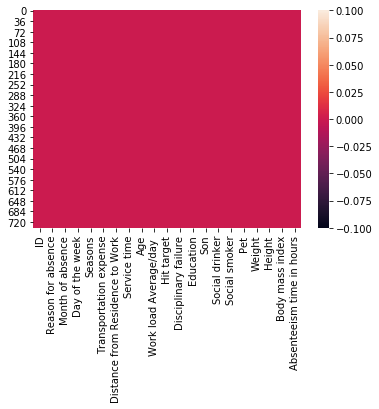

In [80]:
# checking for missing values
sns.heatmap(df.isnull())

In [81]:
df.isnull().sum()
# There are no missing values in the data

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

#### Univariate Analysis

In [82]:
# checking the unique values and its counts
for i in df.columns:
    print("The unique counts of ", i, "are: " )
    print(df[i].value_counts())
    print("\n")

The unique counts of  ID are: 
3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64


The unique counts of  Reason for absence are: 
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64


The unique counts of  Month of absence are: 
3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64


The unique coun

Observations
1. There are 3 rows in which month is zero. This needs to be deleted

In [83]:
#removing rows where month is zero
df=df[df['Month of absence']!=0]
df['Month of absence'].value_counts()
#The zero has been ignored in the new dataset

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
Name: Month of absence, dtype: int64

Observations
1. The most reasons for the absence are between 22-28.
2. Most of the absences were in the months of 6-June, followed by 11-Nov.
3. Thursday has lesser no. of absentees.
4. Most of the transportation expenses is between 160-180, followed by 220-240.
5. Many people stay far from work place, the most repeated distance is between 25-30 and between 47-52. 
6. Most of the work load average per day is between 260-270 and between 240-250.
7. Hit targets are between 90-100 mostly.
8. Absenteeism in right skewed. May be lot of outliers are present.
9. Most repeated BMI is over 30.
10. Most of the height is between 170-173
11. The most repeated weight is 85-90 and around 70 kgs.

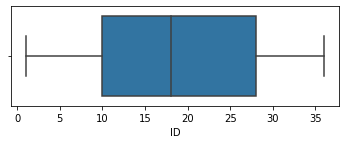

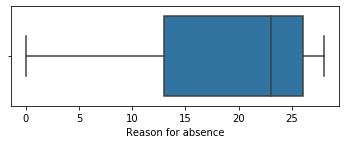

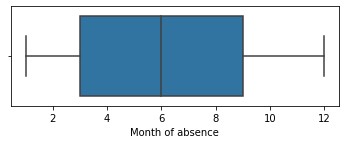

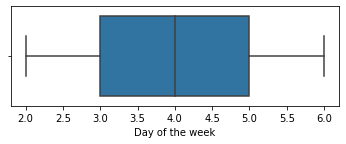

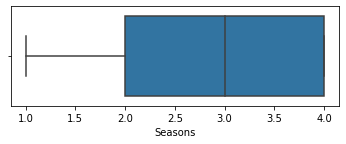

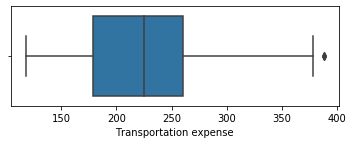

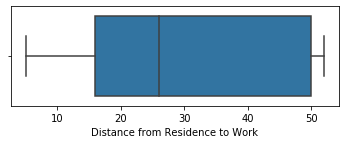

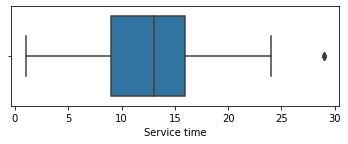

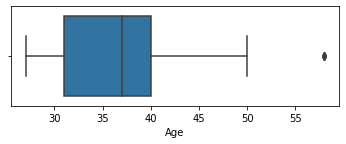

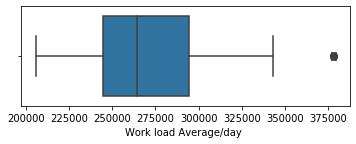

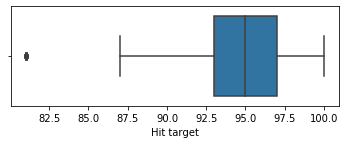

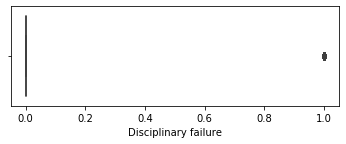

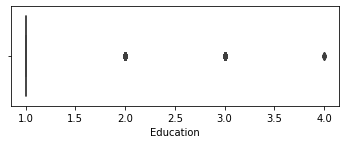

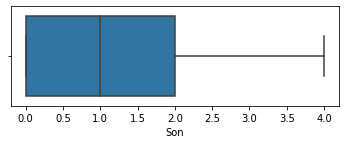

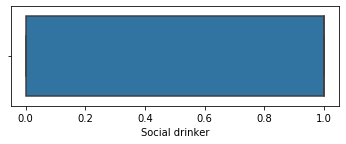

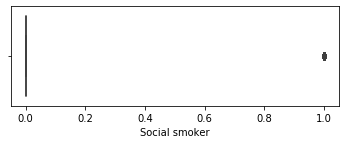

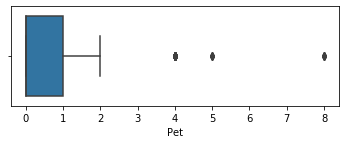

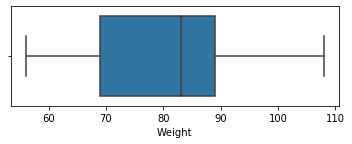

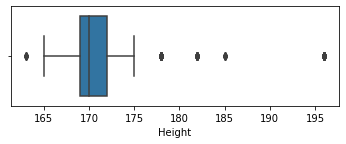

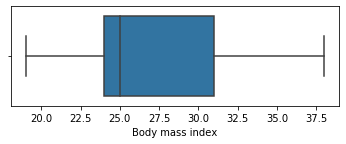

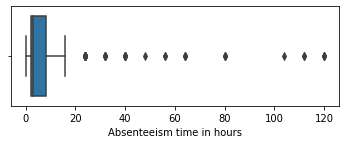

In [84]:
#checking for outliers using boxplot

for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(20,15))
        plt.subplot(7,3,21)
        sns.boxplot(df[i])

Observations
1. Absenteeism time in hours and height have outliers.
2. Rest all column have very few and few have no outliers.

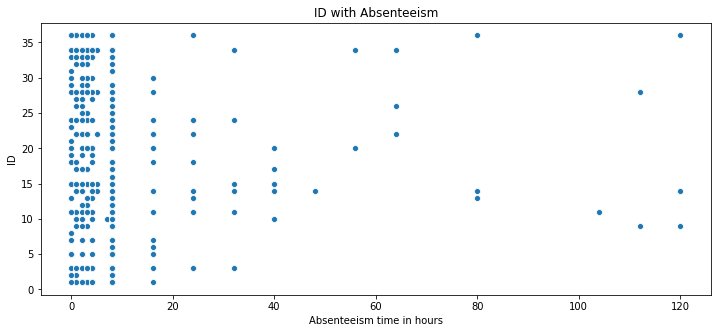

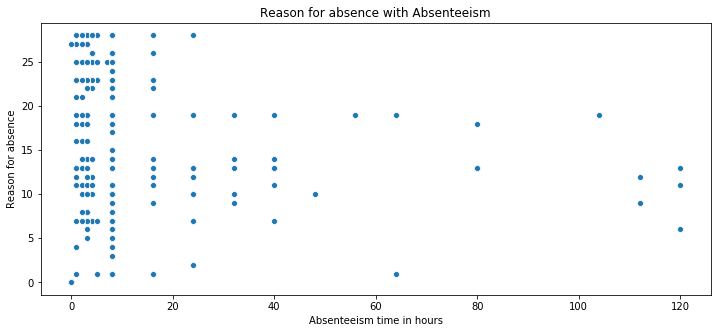

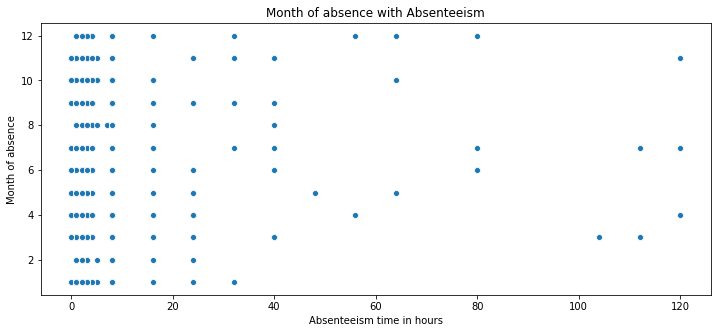

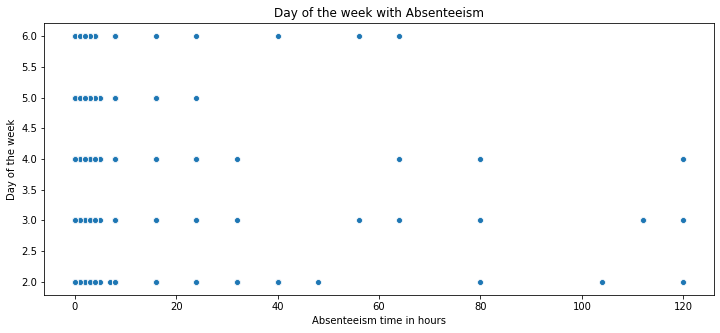

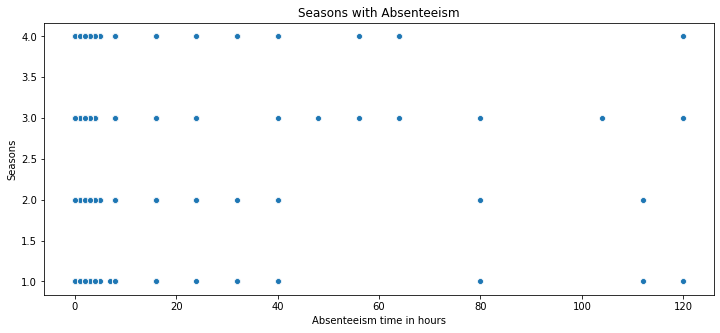

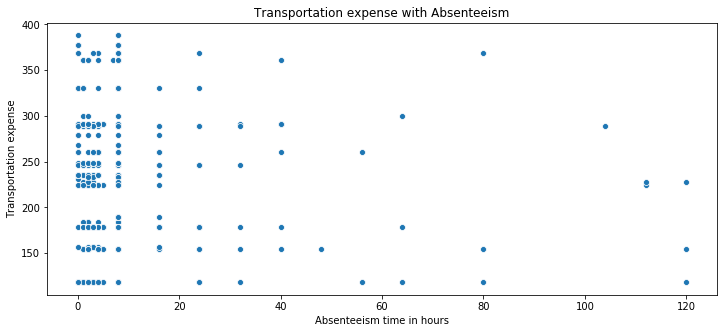

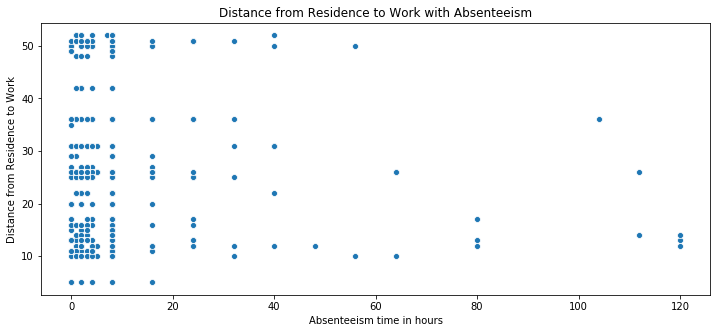

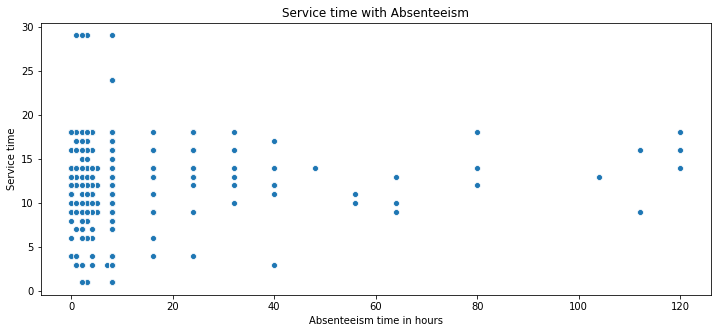

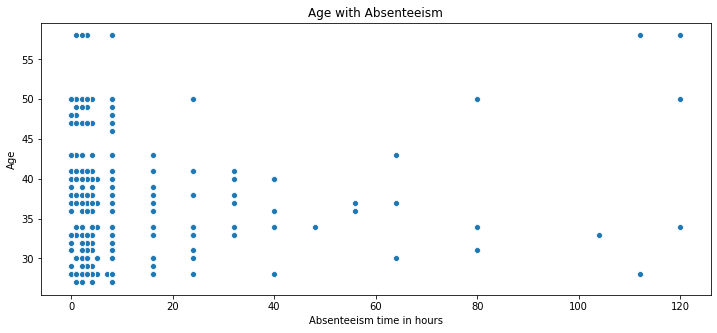

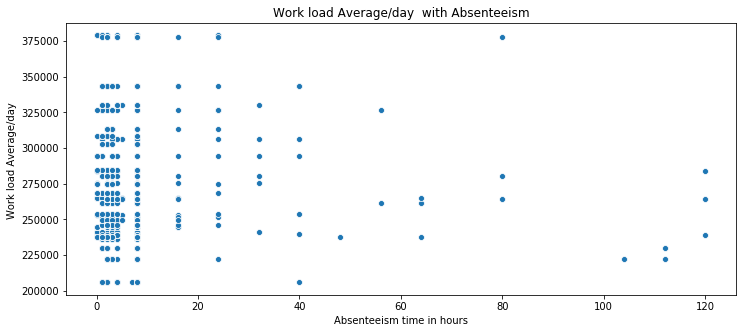

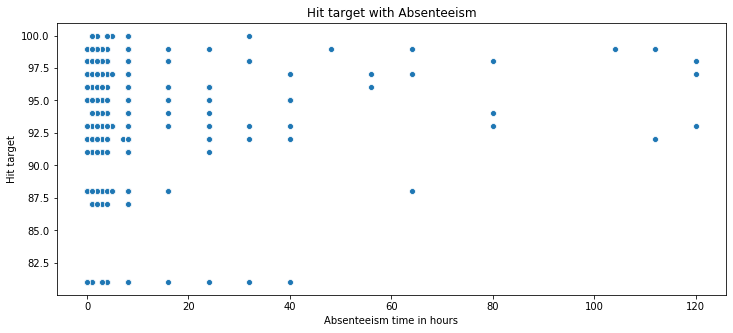

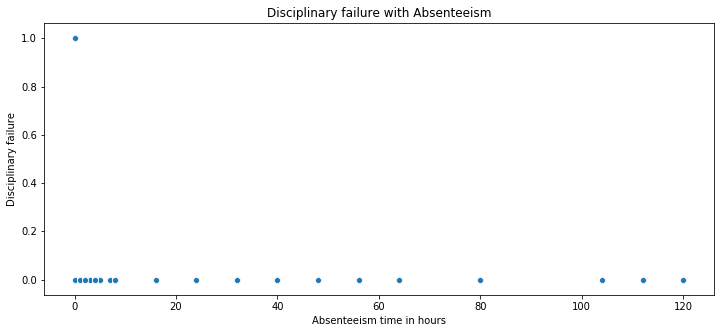

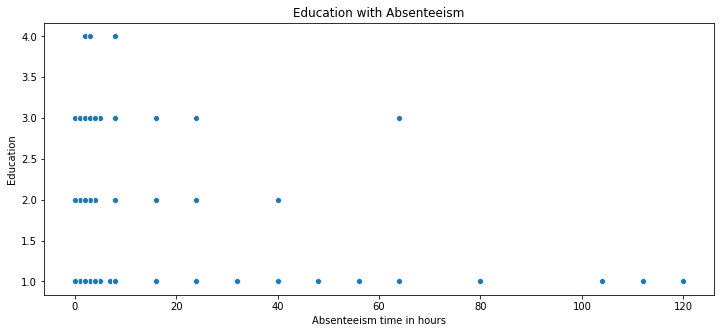

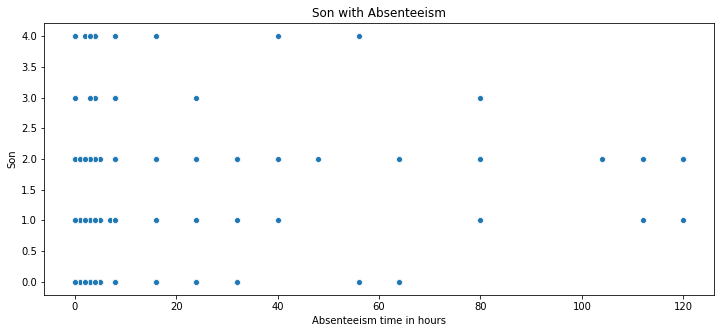

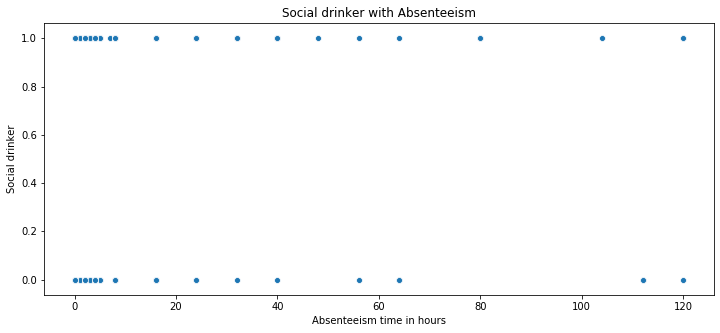

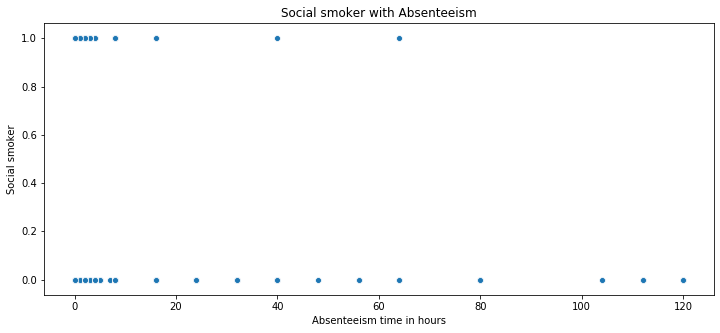

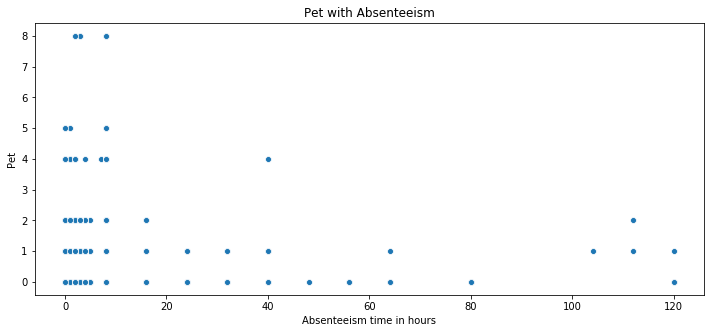

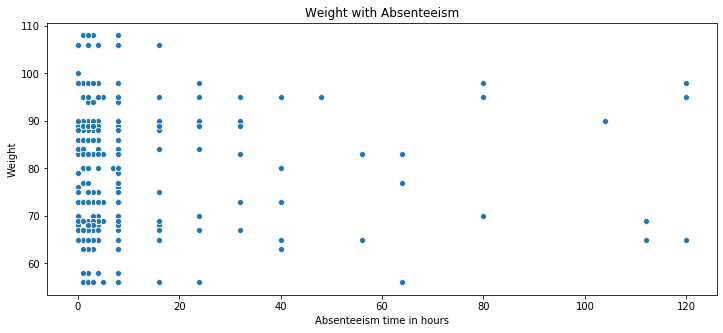

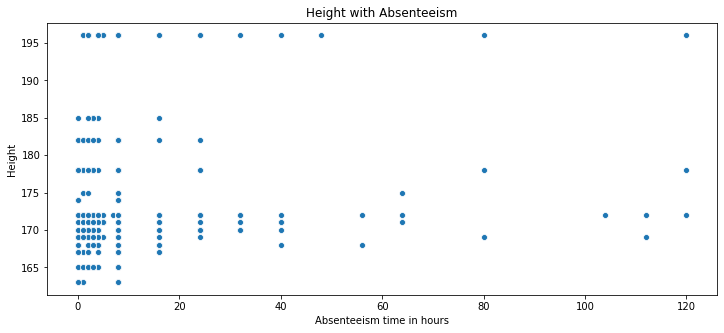

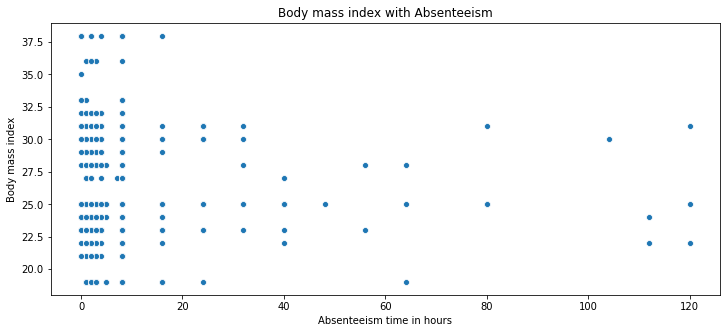

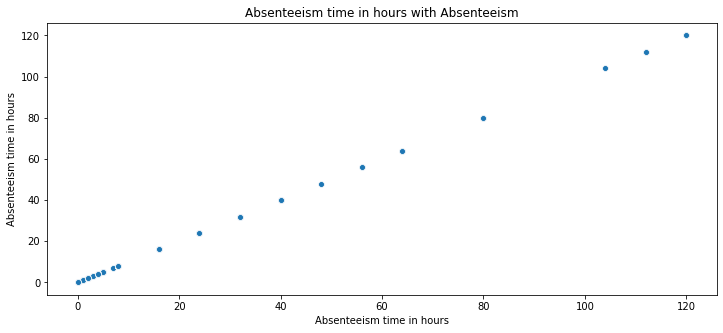

In [85]:
#scatterplots to check relationship with the target variable

for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Absenteeism')
        sns.scatterplot(x=df['Absenteeism time in hours'], y=df[i], data=df)
        plt.show()

#### checking correlation

In [86]:
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.067157,-0.001661,0.030529,0.095106,-0.226494,-0.492063,-0.273746,0.037302,0.092754,0.018946,0.004309,-0.036765,0.003887,-0.448699,-0.011108,-0.031957,-0.250996,0.074600,-0.303171,-0.018519
Reason for absence,-0.067157,1.000000,-0.102748,0.120543,-0.123988,-0.127263,0.164906,0.051336,-0.068840,-0.124865,0.090925,-0.553221,-0.051957,-0.053301,0.068152,-0.119597,-0.036494,0.008961,-0.080842,0.048028,-0.179952
Month of absence,-0.001661,-0.102748,1.000000,-0.004358,0.407560,0.133624,-0.003052,-0.061394,0.007308,-0.171228,-0.462852,0.106907,-0.069891,0.081789,0.058240,-0.040996,0.066275,0.030949,-0.070007,0.059889,0.020603
Day of the week,0.030529,0.120543,-0.004358,1.000000,0.044661,0.034014,0.115404,0.020698,-0.000173,0.015682,0.030910,-0.014861,0.059162,0.098248,0.044896,0.013518,-0.025144,-0.128165,-0.083531,-0.102128,-0.124021
Seasons,0.095106,-0.123988,0.407560,0.044661,1.000000,0.034655,-0.065629,-0.010693,-0.012282,0.150664,-0.061035,0.151547,-0.003824,0.047623,-0.043279,-0.049317,0.023789,-0.022446,-0.034961,-0.006345,-0.006666
Transportation expense,-0.226494,-0.127263,0.133624,0.034014,0.034655,1.000000,0.261707,-0.350174,-0.225775,0.005429,-0.080046,0.108782,-0.056390,0.383716,0.146350,0.043672,0.421375,-0.205870,-0.195185,-0.134531,0.026215
Distance from Residence to Work,-0.492063,0.164906,-0.003052,0.115404,-0.065629,0.261707,1.000000,0.131477,-0.149825,-0.068781,-0.013938,-0.056510,-0.259909,0.053906,0.456205,-0.075368,0.218045,-0.046564,-0.355040,0.116527,-0.088307
Service time,-0.273746,0.051336,-0.061394,0.020698,-0.010693,-0.350174,0.131477,1.000000,0.672880,-0.000661,-0.007954,0.000026,-0.212666,-0.047551,0.353875,0.072737,-0.451301,0.456684,-0.053168,0.501195,0.019580
Age,0.037302,-0.068840,0.007308,-0.000173,-0.012282,-0.225775,-0.149825,0.672880,1.000000,-0.039580,-0.039933,0.105954,-0.220955,0.056876,0.217472,0.123677,-0.242845,0.420672,-0.064528,0.474164,0.068590
Work load Average/day,0.092754,-0.124865,-0.171228,0.015682,0.150664,0.005429,-0.068781,-0.000661,-0.039580,1.000000,-0.089444,0.029022,-0.075001,0.027843,-0.033772,0.030965,0.007334,-0.038621,0.103346,-0.091102,0.024748


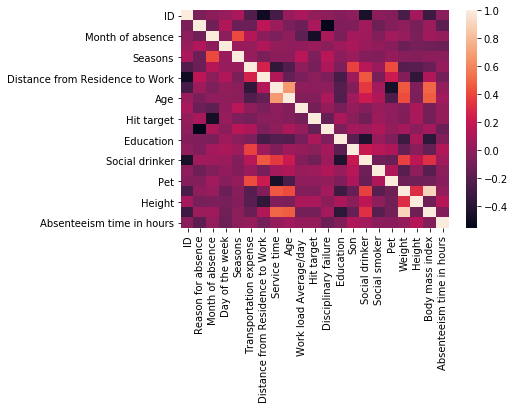

In [87]:
sns.heatmap(df.corr())

Observations
1. None of the attributes show clear positive correlation with the target absenteeism.
2. Age has positive correlation of some extent with BMI, weight and service.


#### Analysing by grouping data


In [88]:
df.groupby(['Month of absence'])[['Absenteeism time in hours']].sum()

,Absenteeism time in hours
Month of absence,
1,222
2,294
3,765
4,482
5,400
6,411
7,734
8,288
9,292


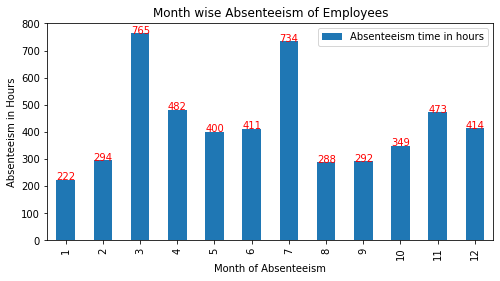

In [89]:
month_absenteeism=df.groupby(['Month of absence'])[['Absenteeism time in hours']].sum()
ax=month_absenteeism.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(month_absenteeism.values):
     ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Month of Absenteeism')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Month wise Absenteeism of Employees')
plt.show()

Observations
1. July and March have noticed highest absenteeism in total no.of hours.

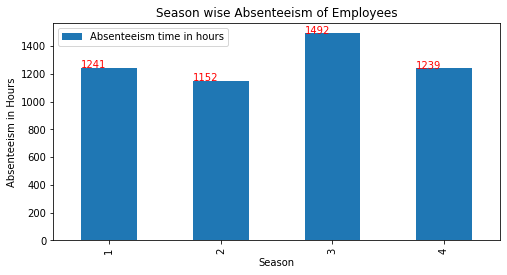

In [90]:
df.groupby(['Seasons']).sum()
season_absenteeism=df.groupby(['Seasons'])[['Absenteeism time in hours']].sum()
ax=season_absenteeism.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(season_absenteeism.values):
     ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Season')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Season wise Absenteeism of Employees')
plt.show()

Observations
1. Winter has witnessed more absenteeism followed by summer.

In [91]:
df.groupby(['Disciplinary failure']).mean()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Disciplinary failure,,,,,,,,,,,,,,,,,,,,
0,18.015782,20.401722,6.262554,3.918221,2.506456,219.770445,29.824964,12.549498,36.25538,271219.416069,94.72023,1.302726,0.998565,0.560976,0.065997,0.727403,78.757532,172.131994,26.575323,7.351506
1,18.225000,0.000000,7.875000,3.825000,3.250000,251.900000,26.125000,12.550000,39.27500,276229.600000,92.25000,1.125000,1.350000,0.675000,0.200000,0.850000,82.925000,171.850000,28.100000,0.000000


Observations
1. The absenteeism time where displinary failure is 1 is zero.
2. Where displinary failure is zero, the avg absenteeism is 7.32 hours.

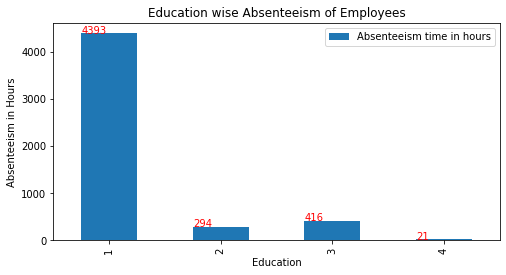

In [92]:

education_absenteeism=df.groupby(['Education'])[['Absenteeism time in hours']].sum()
ax=education_absenteeism.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(education_absenteeism.values):
     ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Education')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Education wise Absenteeism of Employees')
plt.show()

Observations
1. Absenteeism is highest amongst those who education is upto high school level.
2. The average absenteeism is less for post graduates and phds and masters.


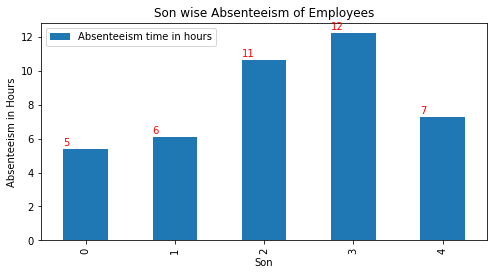

In [93]:
df.groupby(['Son']).mean()
son_absenteeism=df.groupby(['Son'])[['Absenteeism time in hours']].mean()
ax=son_absenteeism.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(son_absenteeism.values):
     ax.text(i-.25, v +0.2, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Son')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Son wise Absenteeism of Employees')
plt.show()

Observations:
1. Where avg no of sons are 3 and 4, the average absenteeism is highest at 10 and 12 respectively.

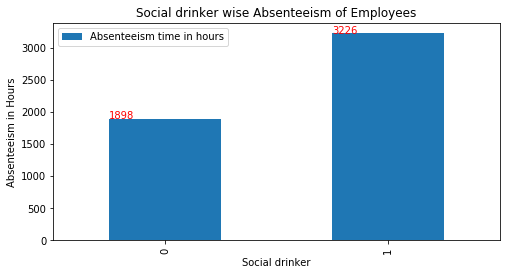

In [94]:

Socialdrinker_absenteeism=df.groupby(['Social drinker'])[['Absenteeism time in hours']].sum()
ax=Socialdrinker_absenteeism.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(Socialdrinker_absenteeism.values):
     ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Social drinker')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Social drinker wise Absenteeism of Employees')
plt.show()

Observations:
1. The total absenteeism is more when a person is social drinker.

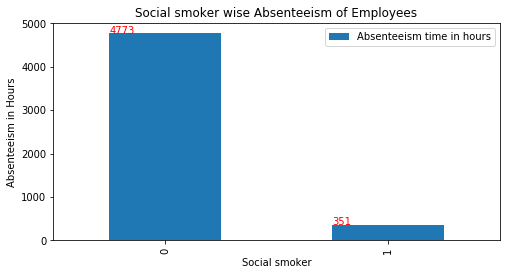

In [95]:

Social_smoker_absenteeism=df.groupby(['Social smoker'])[['Absenteeism time in hours']].sum()
ax=Social_smoker_absenteeism.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(Social_smoker_absenteeism.values):
     ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Social smoker')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Social smoker wise Absenteeism of Employees')
plt.show()

Observations
1. The total no. of hours of a social smoker is very less than the non social smoker.

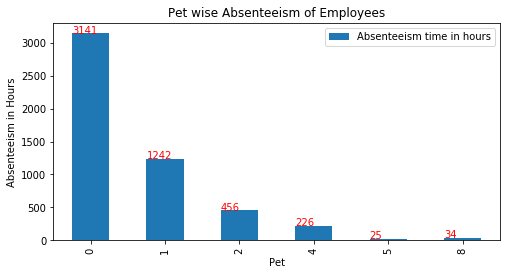

In [96]:

Pet_absenteeism=df.groupby(['Pet'])[['Absenteeism time in hours']].sum()
ax=Pet_absenteeism.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(Pet_absenteeism.values):
     ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Pet')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Pet wise Absenteeism of Employees')
plt.show()

Observations
1. Absenteeism is highest when there are no pets and with no. of pets increasing, the total hours of absenteeism decreases.

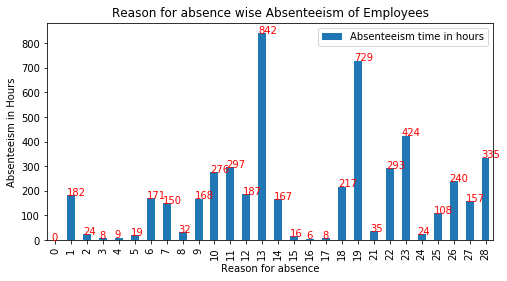

In [97]:

Reason_for_absence_absenteeism=df.groupby(['Reason for absence'])[['Absenteeism time in hours']].sum()
ax=Reason_for_absence_absenteeism.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(Reason_for_absence_absenteeism.values):
     ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Reason for absence')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Reason for absence wise Absenteeism of Employees')
plt.show()

Observations
1. Reason no. 13 (Diseases of the musculoskeletal system and connective tissue) and reason no. 19 ( Injury, poisoning and certain other consequences of external causes) accounts for two highest reasons for absenteeism.


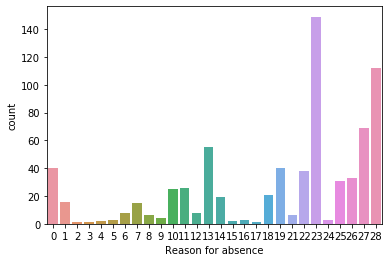

In [98]:
sns.countplot(df['Reason for absence'])

Observations
1. The no. of times the reasons repeated most for the absence are :
    reason no. 23 -  medical consultation 
    reason no. 28 -  dental consultation 

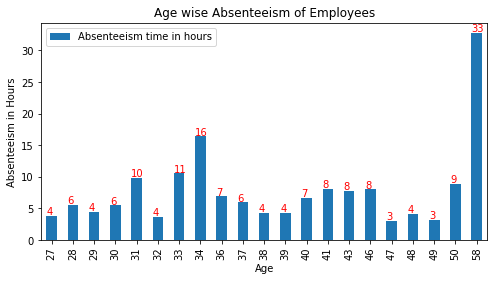

In [99]:
age_absent=df.groupby(['Age'])[['Absenteeism time in hours']].mean()
ax=age_absent.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(age_absent.values):
     ax.text(i-.25, v +0.2, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Age wise Absenteeism of Employees')
plt.show()

Observations
For age 58, the absenteeism is high at 33, for rest it doesn't make much difference.

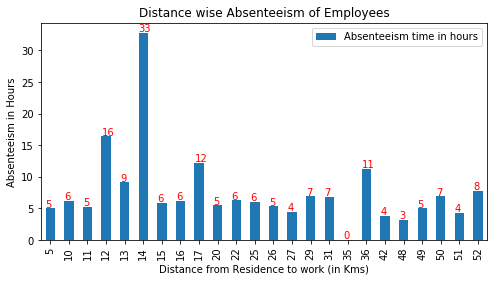

In [100]:
dist_absent=df.groupby(['Distance from Residence to Work'])[['Absenteeism time in hours']].mean()
ax=dist_absent.plot(kind='bar',figsize=(8,4))
for i,v in enumerate(dist_absent.values):
     ax.text(i-.25, v +0.2, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Distance from Residence to work (in Kms)')
ax.set_ylabel('Absenteeism in Hours')
ax.set_title('Distance wise Absenteeism of Employees')
plt.show()

In [101]:
#There is no relationship between distance from residence to work and absenteeism.

In [102]:
#removing the column
#ID column is unique and repetitive and can be removed
df1=df.drop('ID',axis=1)
df1.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


#### removing outliers

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
print("The datashape before removing outliers is ", df1.shape)
df2=df1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df2.shape)

The datashape before removing outliers is  (737, 20)
The datashape after removing outliers is  (574, 20)


#### splitting the data into input and output variables
The data will be split into input and output variables. 

In [104]:
x=df2.iloc[:,0:-1]
y=pd.DataFrame(df2.iloc[:,-1])
x.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
5,23,7,6,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
6,22,7,6,1,361,52,3,28,239554,97,0,1,1,1,0,4,80,172,27


In [105]:
y.head()

,Absenteeism time in hours
0,4
2,2
4,2
5,2
6,8


#### Checking the skewness in the datasets

In [106]:
x.skew()

Reason for absence                -1.013913
Month of absence                   0.112640
Day of the week                    0.084895
Seasons                           -0.019668
Transportation expense             0.325314
Distance from Residence to Work    0.204322
Service time                      -0.148807
Age                                0.503395
Work load Average/day              1.018241
Hit target                        -0.460344
Disciplinary failure               0.000000
Education                          1.984304
Son                                1.452847
Social drinker                    -0.189487
Social smoker                      0.000000
Pet                                1.731443
Weight                            -0.129907
Height                             1.455586
Body mass index                    0.032502
dtype: float64

In [107]:
#using log1p method to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [108]:
x.skew()
#skewness is reduced to a large extent

Reason for absence                -1.013913
Month of absence                   0.112640
Day of the week                    0.084895
Seasons                           -0.019668
Transportation expense             0.325314
Distance from Residence to Work    0.204322
Service time                      -0.148807
Age                                0.503395
Work load Average/day              0.668633
Hit target                        -0.460344
Disciplinary failure               0.000000
Education                          1.944621
Son                                0.582118
Social drinker                    -0.189487
Social smoker                      0.000000
Pet                                0.972281
Weight                            -0.129907
Height                             1.372779
Body mass index                    0.032502
dtype: float64

In [109]:
#Scaling the data

In [110]:
#We need to scale the data for normalising the input data and for the same we can use Standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.724295,0.201985,-0.654547,-1.402022,1.014924,0.340692,0.185913,-0.441441,-0.803606,0.667308,0.0,-0.432432,1.179584,0.909959,0.0,0.673763,0.932441,0.386572,0.746306
1,0.299053,0.201985,0.045099,-1.402022,-0.651629,1.357455,1.387646,0.393718,-0.803606,0.667308,0.0,-0.432432,-0.946874,0.909959,0.0,-0.725913,0.850964,-0.249184,0.987104
2,0.299053,0.201985,0.744745,-1.402022,1.014924,0.340692,0.185913,-0.441441,-0.803606,0.667308,0.0,-0.432432,1.179584,0.909959,0.0,0.673763,0.932441,0.386572,0.746306
3,0.299053,0.201985,1.444391,-1.402022,-0.651629,1.357455,1.387646,0.393718,-0.803606,0.667308,0.0,-0.432432,-0.946874,0.909959,0.0,-0.725913,0.850964,-0.249184,0.987104
4,0.157305,0.201985,1.444391,-1.402022,2.105759,1.425240,-2.217553,-1.276599,-0.803606,0.667308,0.0,-0.432432,0.394771,0.909959,0.0,2.524034,0.117673,0.386572,0.023912


In [111]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [112]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.3094827044561449 is achieved at random state 50


In [113]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=50,test_size=0.20)

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [116]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mse'}

In [117]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'linear'}

In [118]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mse'),SVR(C=10,kernel='linear')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.3094827044561449
The cross val score is 0.11233636357254906
The mean squared error is 10.9848901126873
The root mean squared error is 3.3143461063514925




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.24627351629861338
The cross val score is 0.06713674474030673
The mean squared error is 11.990434782608693
The root mean squared error is 3.462720719695525




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None,

In [119]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.309483,0.112336,10.984890,3.314346
1,KNeighborsRegressor,0.246274,0.067137,11.990435,3.462721
2,DecisionTreeRegressor,-1.410706,-0.743250,38.350000,6.192738
3,SVR,0.301579,0.114650,11.110627,3.333261


In [120]:
#Lets try Lasso and Ridge
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(ls,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.1}

In [121]:
#Let us check the best r2 score for Lasso
ls=Lasso(alpha=0.1)
max_r2_score(ls,x,y)

The maximum r2 score 0.3371927495131596 is achieved at random state 50


In [122]:
#Let us check the cross val score for lasso
cross=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.13465668628980837


#### Ridge

In [123]:
#Let us check the best parameters for Ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(rd,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.1}

In [124]:
#Let us check the best r2 score for Ridge
rd=Ridge(alpha=0.1)
max_r2_score(rd,x,y)

The maximum r2 score 0.31238231317125364 is achieved at random state 50


In [125]:
#Let us check the cross val score for Ridge
cross=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.11370346798830311


#### Ensemble Techniques

#### Random Forest

In [126]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [127]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 50}

In [128]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=50)
max_r2_score(rf,x,y)

The maximum r2 score 0.3913480700949067 is achieved at random state 93


In [129]:
#Lets check the cross val score
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.12233230209951937


#### GradientBoostingRegressor

In [130]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [131]:

#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.01)
max_r2_score(gb,x,y)

The maximum r2 score 0.40527641785350776 is achieved at random state 91


In [132]:
#Let us check the cross val score for GradientBoosting
cross=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.20937345801128285


In [133]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [134]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=200,learning_rate=0.01)
max_r2_score(ad,x,y)

The maximum r2 score 0.39746140515640294 is achieved at random state 93


In [135]:
#Let us check the cross val score for Adaboost
cross=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.22545426200690394


In [136]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.337,0.312,0.366,0.409,0.463],'Cross_val_score':[0.134,0.113,0.165,0.209,0.137]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.337,0.134
1,Ridge,0.312,0.113
2,RandomForestRegressor,0.366,0.165
3,GradientBoostRegressor,0.409,0.209
4,AdaBoostRegressor,0.463,0.137


In [137]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.309483,0.112336,10.984890,3.314346
1,KNeighborsRegressor,0.246274,0.067137,11.990435,3.462721
2,DecisionTreeRegressor,-1.410706,-0.743250,38.350000,6.192738
3,SVR,0.301579,0.114650,11.110627,3.333261


Since the attributes are not having good positive correlation with the target, the scores are less. 

## Classification, not Regression???

Since, we have observed that the target variable didnot show linear relationship with the input, we will have to consider this situation as classification problem instead of regression. Because abseetism is not linearly related with variables.

Let us change the output target from continuous variable to categories to check if it helps in better scores.

In [138]:
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)

In [139]:
df['abs_range']=df['abs_range'].fillna('<4')

In [140]:
df['abs_range'].isnull().sum()

0

In [141]:
x1=df.iloc[:,0:-1]
y1=pd.DataFrame(df['abs_range'])

In [142]:
#### deriving the best random_state for splitting the data into train and test
from sklearn.metrics import accuracy_score

def max_acc_score(reg,x1,y1):
    max_acc_score=0
    for r_state in range(42,101):
        train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x1,train_y1)
        pred=reg.predict(test_x1)
        acc_score=accuracy_score(test_y1,pred)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The max accuracy score ", max_acc_score, "is achieved at", final_r_state)
    return final_r_state

In [143]:
#Checking the decisiontree for the above
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

max_acc_score(dt,x1,y1)

The max accuracy score  1.0 is achieved at 42


42

In [144]:
#We need to finalise the train and test data
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=42,test_size=0.20)

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_


{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [147]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

In [148]:
#After obtaining best parameters, we should now check the models

In [149]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

score=[]
cv=[]



algorithms=[KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=1, kernel='poly'), MultinomialNB()]

for i in algorithms:
    print(i)
    i.fit(train_x1,train_y1)
    pred=i.predict(test_x1)
    accscore=accuracy_score(test_y1,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x1,y1,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y1,pred))
    print()
    cm=confusion_matrix(test_y1,pred)
    print(cm)
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

The accuracy score is  0.6081081081081081

The cross val score is 0.4138812281669425

              precision    recall  f1-score   support

          16       0.00      0.00      0.00         2
         16+       0.00      0.00      0.00         8
           8       0.46      0.26      0.33        47
          <4       0.64      0.86      0.73        91

    accuracy                           0.61       148
   macro avg       0.28      0.28      0.27       148
weighted avg       0.54      0.61      0.55       148


[[ 0  0  0  2]
 [ 0  0  1  7]
 [ 0  0 12 35]
 [ 0  0 13 78]]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=

In [150]:
result=pd.DataFrame({'Model':['KNeighborsClassifier','DecisionTree', 'SVC','MultinomialNB'],'Accuracy Score':score,'Cross_val_score':cv})
result

,Model,Accuracy Score,Cross_val_score
0,KNeighborsClassifier,0.608108,0.413881
1,DecisionTree,1.000000,1.000000
2,SVC,0.614865,0.621438
3,MultinomialNB,0.675676,0.692140


In [151]:
# we can finalise the Decision Tree classifier as it is giving perfect score for accuracy and cross val

dt=DecisionTreeClassifier(criterion= 'entropy', splitter= 'best')
dt.fit(train_x1,train_y1)
pred=dt.predict(test_x1)
score=accuracy_score(test_y1,pred)
cvs=cross_val_score(dt,x1,y1,cv=5).mean()
print("The accuracy score is ", score)
print("The cross validation score is", cvs)

The accuracy score is  1.0
The cross validation score is 1.0


In [152]:
#now we can save the model
from sklearn.externals import joblib
joblib.dump(dt,"Project16_Absenteeism_Classification.pkl")

['Project16_Absenteeism_Classification.pkl']